In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import emoji
import jaconv

In [2]:
cd ../

C:\Users\井原輝人\Desktop\sorcecode\twitter-compe


In [3]:
df = pd.read_csv('./arranged_data/add_all_flg.csv')

In [4]:
df["text_length"] = np.zeros(df.shape[0])
for idx in range(df.shape[0]):
    df["text_length"].loc[idx] = len(df["text"].loc[idx])

c:\users\井原輝人\desktop\sorcecode\twitter-compe\venv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
df

,Unnamed: 0,Unnamed: 0.1,id,flg,keyword,location,text,is_url,is_location,num_emoji,num_reply,num_hash,text_length
0,0,0,20587,0,覚醒剤,icon:大トロ(@sato_wall_aim ),【マイリスト】カカカカ覚醒剤 https://t.co/15ZY9Oa2QS #sm3630...,True,False,0.0,0,1,50.0
1,1,1,31857,0,雷 落雷,ジャングル,@kenjikenji3343 せやな 落雷撃たれたら全員張り付くしかなかったからなぁ なん...,False,False,0.0,1,0,59.0
2,2,2,36793,0,血液,↓↓↓↓↓こちらをクリック↓↓↓↓,【カフェインの力】 体を動かす前にカフェインを摂ると交感神経が刺激され、体内の脂肪が分解され...,False,False,0.0,0,0,139.0
3,3,3,42299,0,ハリケーン,Close to your heart,あなたの鼓膜に直に響かせたい ハリケーンのように激しく愛したい 余計な壁なんて取っ払って 奥...,False,False,0.0,0,0,119.0
4,4,4,51449,0,殺人鬼,偽物なので悪しからず,@Mr8yt 違う違う。お化けは現実にいないけど殺人鬼は現実にいるじゃん〜。うーん、ホラーっ...,False,False,0.0,1,0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20280,20280,20280,45367,0,爆発した,NaN,@front_0v0 まだ爆発したかはわかりません。 一つだけ言えることは、もうすぐ（数万年...,False,True,0.0,1,0,101.0
20281,20281,20281,45546,0,爆発した,🐒🐟 ✩͓̊ 🌊🐷,@w_khtoO ぴこち愛爆発した 。 ぴこちぴこちぴこちいいいいいい 愛してる❤︎,False,False,1.0,1,0,42.0
20282,20282,20282,31532,0,爆発,Japan,今のローテ環境、重要度で言うと 序盤からテンポを取る動き＜進化t以降に爆発的な動き だってこ...,False,False,0.0,0,0,138.0
20283,20283,20283,21619,0,緊急 緊急事態,NaN,@kharaguchi 代議士先生 これは一般国民の意見が耳障りだから と言う理由での恫喝...,False,True,0.0,1,0,102.0


In [6]:
#urlの削除
df = df.replace(r'(https?://[\w/:%#\$&\?\(\)~\.=\+\-]+)',"",regex=True)
#replyの削除
df = df.replace(r'@([A-Za-z0-9_])+',"",regex = True)
#全角スペースを汎化すスペースに
df["text"] = jaconv.z2h(df["text"].str,digit=True, ascii = True) 

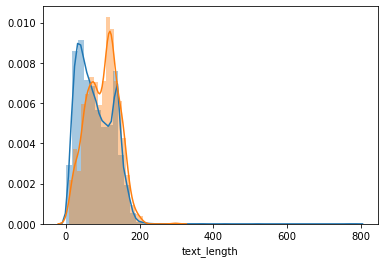

In [7]:
sns.distplot(df[df["flg"]==0]["text_length"])
sns.distplot(df[df["flg"]==1]["text_length"])

In [8]:
df["text_wakati"] = df["text"].str.split(",")

In [9]:
df["num_kusa"] = df["text"].str.count("w")

In [10]:
#分かち書き
from janome.tokenizer import Tokenizer
t= Tokenizer()

for idx in range(0,df.shape[0]):
    df["text_wakati"].loc[idx] = [token.base_form for token in t.tokenize(df["text"].loc[idx])]


c:\users\井原輝人\desktop\sorcecode\twitter-compe\venv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
#一文字ずつ見て1文字だけの単語は削除

        

In [ ]:
#一文字ずつ見て1文字だけの単語は削除
delonelist = list()
for i in range(df.shape[0]):
    wakati = df["text_wakati"].values[i]
    del_one = ""
    for idx in range(len(wakati)):
        if len(str(wakati[idx])) > 1:
            del_one += (wakati[idx]+" ")
    delonelist.append(np.array(del_one))
df["text_del_one"] = np.array(delonelist)
        

In [12]:
df["text_del_one"].values[0]

'ﾏｲﾘｽﾄ ｶｶｶｶ 覚醒剤    sm 36302050 '

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

cv = CountVectorizer()



In [14]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'flg', 'keyword', 'location',
       'text', 'is_url', 'is_location', 'num_emoji', 'num_reply', 'num_hash',
       'text_length', 'text_wakati', 'num_kusa', 'text_del_one'],
      dtype='object')

In [33]:
from scipy.sparse import csr_matrix
# 特徴量の加工
X_df = df[["is_url","is_location","num_emoji","num_reply","num_hash","text_length","num_kusa","text_del_one"]]
X_df["is_url"] = (X_df["is_url"]*1).astype(np.float64)
X_df["is_location"] = (X_df["is_location"]*1).astype(np.float64)
X_df["num_emoji"] = X_df["num_emoji"].astype(np.float64)
X_df["num_reply"] = X_df["num_reply"].astype(np.float64)
X_df["num_hash"] = X_df["num_hash"].astype(np.float64)
X_df["text_length"] = X_df["text_length"].astype(np.float64)
X_df["num_kusa"] = X_df["num_kusa"].astype(np.float64)

print(X_df.info())
X= X_df.values
# 目標値の加工
Y_df = df["flg"].astype(np.int64)
y = Y_df.values

#トレーニングデータとテストデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20285 entries, 0 to 20284
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_url        20285 non-null  float64
 1   is_location   20285 non-null  float64
 2   num_emoji     20285 non-null  float64
 3   num_reply     20285 non-null  float64
 4   num_hash      20285 non-null  float64
 5   text_length   20285 non-null  float64
 6   num_kusa      20285 non-null  float64
 7   text_del_one  20285 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.2+ MB
None


c:\users\井原輝人\desktop\sorcecode\twitter-compe\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\井原輝人\desktop\sorcecode\twitter-compe\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\井原輝人\desktop\sorcecode\twitter-compe\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [34]:

# トレーニング用データにCountVectorizerを適用
X_train = cv.fit_transform(X_train[:,7])



In [35]:
# バリデーション用データにCountVectorizerを適用
X_test = cv.transform(X_test[:,7])

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,
                                    random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score, recall_score,f1_score
import seaborn as sns
def result_heatmap(Y_test,Y_pred):
    print("正解率:"+str(accuracy_score(Y_test, Y_pred)))
    print("適合率:"+str(recall_score(Y_test,Y_pred)))
    print("再現率:"+str(precision_score(Y_test,Y_pred)))
    print("F値:"+str(f1_score(Y_test, Y_pred)))  
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm,annot=True, cmap='Blues')

正解率:0.9682031057431599
適合率:0.5830388692579506
再現率:0.9375
F値:0.718954248366013


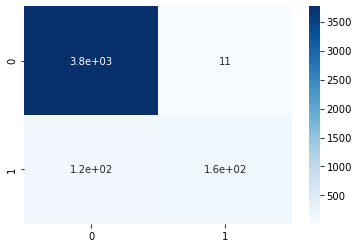

In [78]:
#普通にやると全部違う方に分類される
y_pred = model.predict(X_test)
result_heatmap(y_test,y_pred)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3774
           1       0.94      0.58      0.72       283

    accuracy                           0.97      4057
   macro avg       0.95      0.79      0.85      4057
weighted avg       0.97      0.97      0.96      4057

